# Algoritmo de Clasificación

 **Consigna:**\
Implementar al menos uno de los algoritmos de clasificación vistos en la sesión de
hoy con el dataset propuesto para el proyecto final del curso.

**Recomendaciones:** \
* Basarse en los entregables anteriores para la resolución de la presente actividad.
* Realizar una comparación de los modelos obtenidos y su performance.
* Sería de mucha utilidad aplicar más de un método de clasificación.

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
#from prettytable import PrettyTable
from matplotlib.ticker import FormatStrFormatter

# Gráficos
# ==============================================================================
import matplotlib as mpl            # Matplotlib
import matplotlib.pyplot as plt     # El modulo Pyplot de Matplotlib
import seaborn as sns               # Seaborn
#import plotly.express as px

mpl.style.use('bmh')    # Establecemos un nuevo estilo

# Preprocesado y modelado
# ==============================================================================
from sklearn import preprocessing  # Import label encoder
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test
# Modelos de Clasificacion:
# KNN
from sklearn.neighbors import KNeighborsClassifier
# REGRESCIÓN LOGISTICA
from sklearn.linear_model import LogisticRegression
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier 

# Analisis de acuracy del modelo
# ==============================================================================
from sklearn.metrics import accuracy_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Cargamos el dataset
df = pd.read_csv('../WA_Fn-UseC-HR-Employee-Attrition.csv')
pd.set_option('max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Arrancamos quedandonos con los siguientes parámetros: 

1) Numéricas
* Age
* DistanceFromHome
* Education
* JobInvolvement 
* JobLevel 
* RelationshipSatisfaction
* MonthlyIncome
* NumCompaniesWorked
* PerformanceRating
* TotalWorkingYears
* TrainingTimesLastYear
* WorkLifeBalance
* YearsAtCompany
* YearsInCurrentRole 
* YearsSinceLastPromotion

2) Categoricas \
(que debemos transformar en numerico para el análisis)
* Attrition
* BusinessTravel
* Department
* EducationField
* Gender
* JobRole
* MaritalStatus
* OverTime

**Recordamos el objetivo principal** \
Nuestro objetivo es determinar el attrition, asi que es la variable que vamos a tomar como objetivo.

In [3]:
# copiamos el dataset original
df_1 = df.copy()

# Eliminamos las variables que no queriamos
df_1 = df_1.drop(columns=['DailyRate', 'EmployeeCount' , 'EmployeeNumber', 'HourlyRate', 
     'MonthlyRate', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'Over18'])

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [4]:
# label_encoder nos permite dar un codigo numerico a cada variable categorica.

le_Attrition = preprocessing.LabelEncoder()
df_1['Attrition']   = le_Attrition.fit_transform(df_1['Attrition'] )

le_BusinessTravel = preprocessing.LabelEncoder()
df_1.BusinessTravel = le_BusinessTravel.fit_transform(df_1.BusinessTravel)

le_Department = preprocessing.LabelEncoder()
df_1.Department     = le_Department.fit_transform(df_1.Department)

le_EducationField = preprocessing.LabelEncoder()
df_1.EducationField = le_EducationField.fit_transform(df_1.EducationField)

le_Gender = preprocessing.LabelEncoder()
df_1.Gender         = le_Gender.fit_transform(df_1.Gender)

le_JobRole = preprocessing.LabelEncoder()
df_1.JobRole        = le_JobRole.fit_transform(df_1.JobRole)

le_MaritalStatus = preprocessing.LabelEncoder()
df_1.MaritalStatus  = le_MaritalStatus.fit_transform(df_1.MaritalStatus)

le_OverTime = preprocessing.LabelEncoder()
df_1.OverTime       = le_OverTime.fit_transform(df_1.OverTime)


## Resolución: 
Modelo de Clasificación: **RandomForest**

1. 1ro Separaramos los features en X e y
2. Separaro los datos en Train (70 %) y Test (30 %)
3. Creo un objeto Random Forest 
4. Fiteo el modelo
5. Realizar la predicción de los modelos en Train y Test
6. Calculo la métrica de Accuracy en Train y Test

In [5]:
# 1ro Separaramos los features en X e y
X = df_1.drop('Attrition', axis=1)
y = df_1.Attrition

# Separaro los datos en Train (70 %) y Test (30 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Creo un objeto Random Forest 
random_forest_model = RandomForestClassifier(n_estimators=200, random_state=11)

# Fiteo el modelo
random_forest_model.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=200, random_state=11)

In [6]:
# Realizo la predicción de los modelos en Train y Test
y_train_pred_random_forest_model = random_forest_model.predict(X_train) 
y_test_pred_random_forest_model = random_forest_model.predict(X_test)

# Calculo el accuracy en Train y Test - Random Forest
train_accuracy_random_forest = accuracy_score(y_train, y_train_pred_random_forest_model)
test_accuracy_random_forest = accuracy_score(y_test, y_test_pred_random_forest_model)

print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy_random_forest,3))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy_random_forest,3))


% de aciertos sobre el set de entrenamiento: 1.0
% de aciertos sobre el set de evaluación: 0.862


Podemos ver para que cantidad de estimadores ya entramos en el rango de overfitting

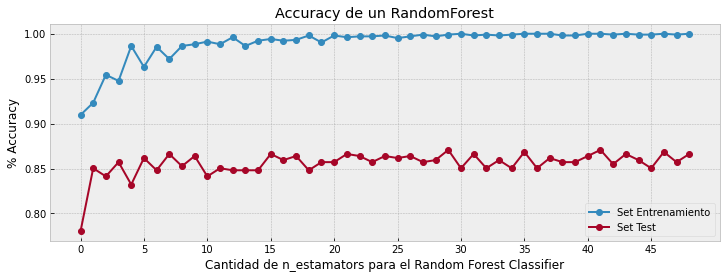

In [7]:
A_train = []
A_test = []

for i in range(1,50):
    
    # Separamos el dataset, creamos y ejecutamos el modelo
    random_forest_model = RandomForestClassifier(n_estimators = i) #, random_state = 42) #Creamos el modelo
    random_forest_model.fit(X_train,y_train) #Entrenamos el modelo
    y_train_pred = random_forest_model.predict(X_train) #Prediccion en Train
    y_test_pred = random_forest_model.predict(X_test) #Prediccion en Test
    train_accuracy = accuracy_score(y_train, y_train_pred) #Calculo el accuracy en Train
    test_accuracy = accuracy_score(y_test, y_test_pred) #Calculo el accuracy en Test
    
    # Acumulo los resultados de Accuracy para cada corrida:
    
    A_train.append(train_accuracy)
    A_test.append(test_accuracy)
    
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(A_train,marker='o', label='Set Entrenamiento')
ax.plot(A_test,marker='o', label='Set Test', color='C1')

ax.set_xlabel('Cantidad de n_estamators para el Random Forest Classifier')
ax.set_xticks(range(0,50,5))
ax.set_ylabel('% Accuracy')
#ax.set_ylim(0, 1.1)
ax.set_title('Accuracy de un RandomForest')
ax.legend()

Aqui vemos que mas alla de 10 arboles en el bosque, no mejora el accuracy y se observa overfiting en el set de entrenamiento.\
Veamos como varia el accuracy en funcion de la maxima profundidad, habiendo sumido n_estimators = 10

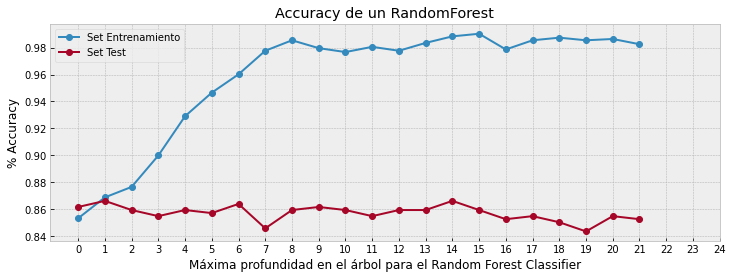

In [8]:
A_train = []
A_test = []

for i in range(3,25):
    
    # Separamos el dataset, creamos y ejecutamos el modelo
    random_forest_model = RandomForestClassifier(n_estimators = 10, max_depth = i) #, random_state = 42) #Creamos el modelo
    random_forest_model.fit(X_train,y_train) #Entrenamos el modelo
    y_train_pred = random_forest_model.predict(X_train) #Prediccion en Train
    y_test_pred = random_forest_model.predict(X_test) #Prediccion en Test
    train_accuracy = accuracy_score(y_train, y_train_pred) #Calculo el accuracy en Train
    test_accuracy = accuracy_score(y_test, y_test_pred) #Calculo el accuracy en Test
    
    # Acumulo los resultados de Accuracy para cada corrida:
    
    A_train.append(train_accuracy)
    A_test.append(test_accuracy)
    
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(A_train,marker='o', label='Set Entrenamiento')
ax.plot(A_test,marker='o', label='Set Test', color='C1')

ax.set_xlabel('Máxima profundidad en el árbol para el Random Forest Classifier')
ax.set_xticks(range(0,25,1))
ax.set_ylabel('% Accuracy')
#ax.set_ylim(0, 1.1)
ax.set_title('Accuracy de un RandomForest')
ax.legend()

Vemos que mas alla de 3 o quizas 4 niveles, la diferencia de accuracy entre el set de test y el de entrenamiento se separan, mostrando overfiting en el set de entrenamiento.

## Resolución: 
Modelo de Clasificación: **LogisticRegression**

1. 1ro Separaramos los features en X e y
2. Separaro los datos en Train (70 %) y Test (30 %)
3. Creo un objeto LogisticRegression 
4. Fiteo el modelo
5. Realizar la predicción de los modelos en Train y Test
6. Calculo la métrica de Accuracy en Train y Test

In [9]:
# 1ro Separaramos los features en X e y
X = df_1.drop('Attrition', axis=1)
y = df_1.Attrition

# Separaro los datos en Train (70 %) y Test (30 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Creo un objeto LogisticRegression
regresion_logistica = LogisticRegression()

# Fiteo el modelo
regresion_logistica.fit(X_train, y_train) 

LogisticRegression()

In [10]:
# Realizo la predicción de los modelos en Train y Test
y_train_pred_regresion_logistica = regresion_logistica.predict(X_train) 
y_test_pred_regresion_logistica = regresion_logistica.predict(X_test)

#Calculo el accuracy en Train y Test - Regresion logistica
train_accuracy_regresion_logistica = accuracy_score(y_train, y_train_pred_regresion_logistica)
test_accuracy_regresion_logistica = accuracy_score(y_test, y_test_pred_regresion_logistica)

print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy_regresion_logistica,3))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy_regresion_logistica,3))


% de aciertos sobre el set de entrenamiento: 0.839
% de aciertos sobre el set de evaluación: 0.844


Tiene un buen valor de accuracy, en particular porque para el set de entrenamiento y el de test son parecidos, con una diferencia de 0.01%. Por lo tanto, resulta en un buen modelo con un accuracy de mas de un 80% en la predicción de la clasificación.